# Assignment 1 - 02467 Computational Social Science 

#### Matilde Maria de Place, s183960; Rasmus Stokholm Bryld, s183898; Sunniva Olsrud Punsvik, s183924

In [1]:
#Load packages 
import matplotlib as mpl
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates

# Part 1: Datasets for Computational Social Science

To study the topic of how people preserve their mental and physical health one could consider using timeseries data comprising information of number of google searches on topics as _bread_, _baking_, _kniting_, _dogs_, _training_, _*some kind of sport*_ etc.  With this information one can test if there is an increased interrest have considereed "lockdown-friendly" hobbies including sports, a hobby that relates to physical health. 

One can collect data from google via _google trends_. Regarding number of obervations, from _google trends_ one obtain one observation per key words per day. To obtain equal amount of data before contra during lockdown one should use data from approx. 1/1/19 to today which will result in 785 data points per key words (assuming data is collected 24/2-21). In total the dataset will comprise one date variable as well as one discrete variable per key word. The later describing the number of times a certain key words has been searhed. 

When it comes to google searches, one shall bear in mind that the data could be non-representive as it possibly excludes elder people or those less comfortable using computers. Peforming an additional research using e.g. surveys could potentially help obtaining a more representative result though it will be costly and introduce other problematics.  Furthermore, one ought to consider including multiple languages for each key word to include difference nationalities as well as data from several search engines. 

In extend, due to behavioral drift one cannot be certain that possible results are a true image of increased interrest in "lockdown-friendly" hobbies. The results might be affected by an increase in time spend on the computer. Furthermore, data could potentially be algorithmically confounded meaning that when a user performs a google search they will encounter more advertisement regarding the particualr subject thus performing searches becomes self perpetuating.




# Part 2: r/wallstreetbets authors lifespan

### (1) Finding the first time each author posted a comment and their last time


In [53]:
def setup_mpl():
    mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['font.size'] = 9
    mpl.rcParams['figure.figsize'] = (5, 5)
    mpl.rcParams['figure.dpi'] = 200
setup_mpl()

# r/wallstreetbets data
reddit_data = pd.read_csv(r"C:\Users\sunni\OneDrive\Dokumenter\DTU\Semester 6\Social Informatik\Assignments\gme_reddit_comments.csv")


In [49]:
# Dataframe for the dataset
# created_utc is the unix timestamp and creation_date is the date when the comments were posted 
reddit_data

,id,submission_id,score,created_utc,creation_date,author,parent_id
0,gkjkq9i,t3_l3y4mp,82,1611489991,2021-01-24,skinfather11216,t3_l3y4mp
1,gkjkjmx,t3_l3y4mp,9,1611489944,2021-01-24,DivingDeep21,t1_gkjja9s
2,gkjkiyd,t3_l3y4mp,28,1611489939,2021-01-24,je_veux_sentir,t1_gkjjk3k
3,gkjkiki,t3_l3y4mp,18,1611489936,2021-01-24,BlazingLeo,t1_gkjjk3k
4,gkjkdnm,t3_l3y4mp,11,1611489901,2021-01-24,Anon-1400secret,t1_gkjjzr8
...,...,...,...,...,...,...,...
508617,fcp4s0n,t3_eick65,1,1577850451,2020-01-01,jawnee-cash,t3_eick65
508618,fcp4j6m,t3_eick65,1,1577850230,2020-01-01,billwhiz,t1_fcp44yc
508619,fcp4chb,t3_eick65,1,1577850071,2020-01-01,Sakira-Cadman,t1_fcp44yc
508620,fcp44yc,t3_eick65,1,1577849890,2020-01-01,perfectentry1,t3_eick65


### (2) Finding the lifespan of authors

In [5]:
# Defining min_time as the first and max_time as the last comment of each author in the data using pandas groupby
min_time = reddit_data.groupby(['author']).created_utc.min()
print(min_time)
max_time = reddit_data.groupby(['author']).created_utc.max()
print(max_time)

author
----The_Truth-----      1602188181
----Zero----            1611262117
---MrP---               1609017376
---Tim---               1590678467
--Burt-Macklin-FBI--    1610558553
                           ...    
zzscrubzz               1611342400
zzzaacchh               1609273859
zzzzazzzzzz             1611281917
zzzzbear                1611248244
zzzzzephyr              1611246750
Name: created_utc, Length: 73416, dtype: int64
author
----The_Truth-----      1603376104
----Zero----            1611327385
---MrP---               1609096857
---Tim---               1610402953
--Burt-Macklin-FBI--    1610762473
                           ...    
zzscrubzz               1611344241
zzzaacchh               1611160876
zzzzazzzzzz             1611281917
zzzzbear                1611248244
zzzzzephyr              1611359700
Name: created_utc, Length: 73416, dtype: int64


In [6]:
# lifespan of each author by subtracting the last comment to the first
lifespan = max_time - min_time

# Convert unix timestamps from seconds to days
lifespan_days = (lifespan/(60*60*24)).dropna().values

In [7]:
print(lifespan_days.mean())
max(lifespan_days), min(lifespan_days)

14.545144007645169


(389.16753472222223, 0.0)

In [29]:
# Specifying the bins, here everything between 5 to 150 days is chosen,
# this is due to many authors posting only one comment, thus the lifespan becomes 0
# There are not many authors who has continuously posted comments on the subreddit for more 
# than a year, thus the bins has been scaled down to better showcase the distribution of lifespan
bins = np.linspace(5, 150, 75)
width = bins[1]-bins[0]

In [30]:
hist, edges = np.histogram(lifespan_days, bins=bins)

# Half-way point
x = (edges[1:]+edges[:-1])/2

Text(0.5, 1.0, 'Lifespan of authors on the GME subreddit')

findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans.


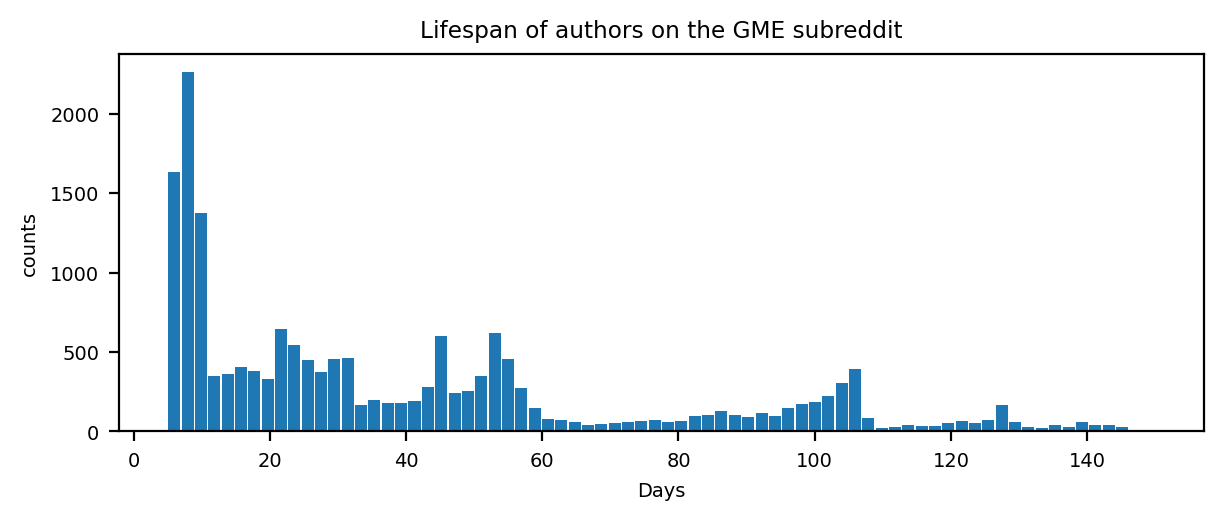

In [34]:
fig, ax = plt.subplots()
ax.bar(x, hist, width=width*0.9)
ax.set_xlabel('Days')
ax.set_ylabel('counts')
ax.set_title("Lifespan of authors on the GME subreddit")

### (3)-(5) Creating 2d histogram

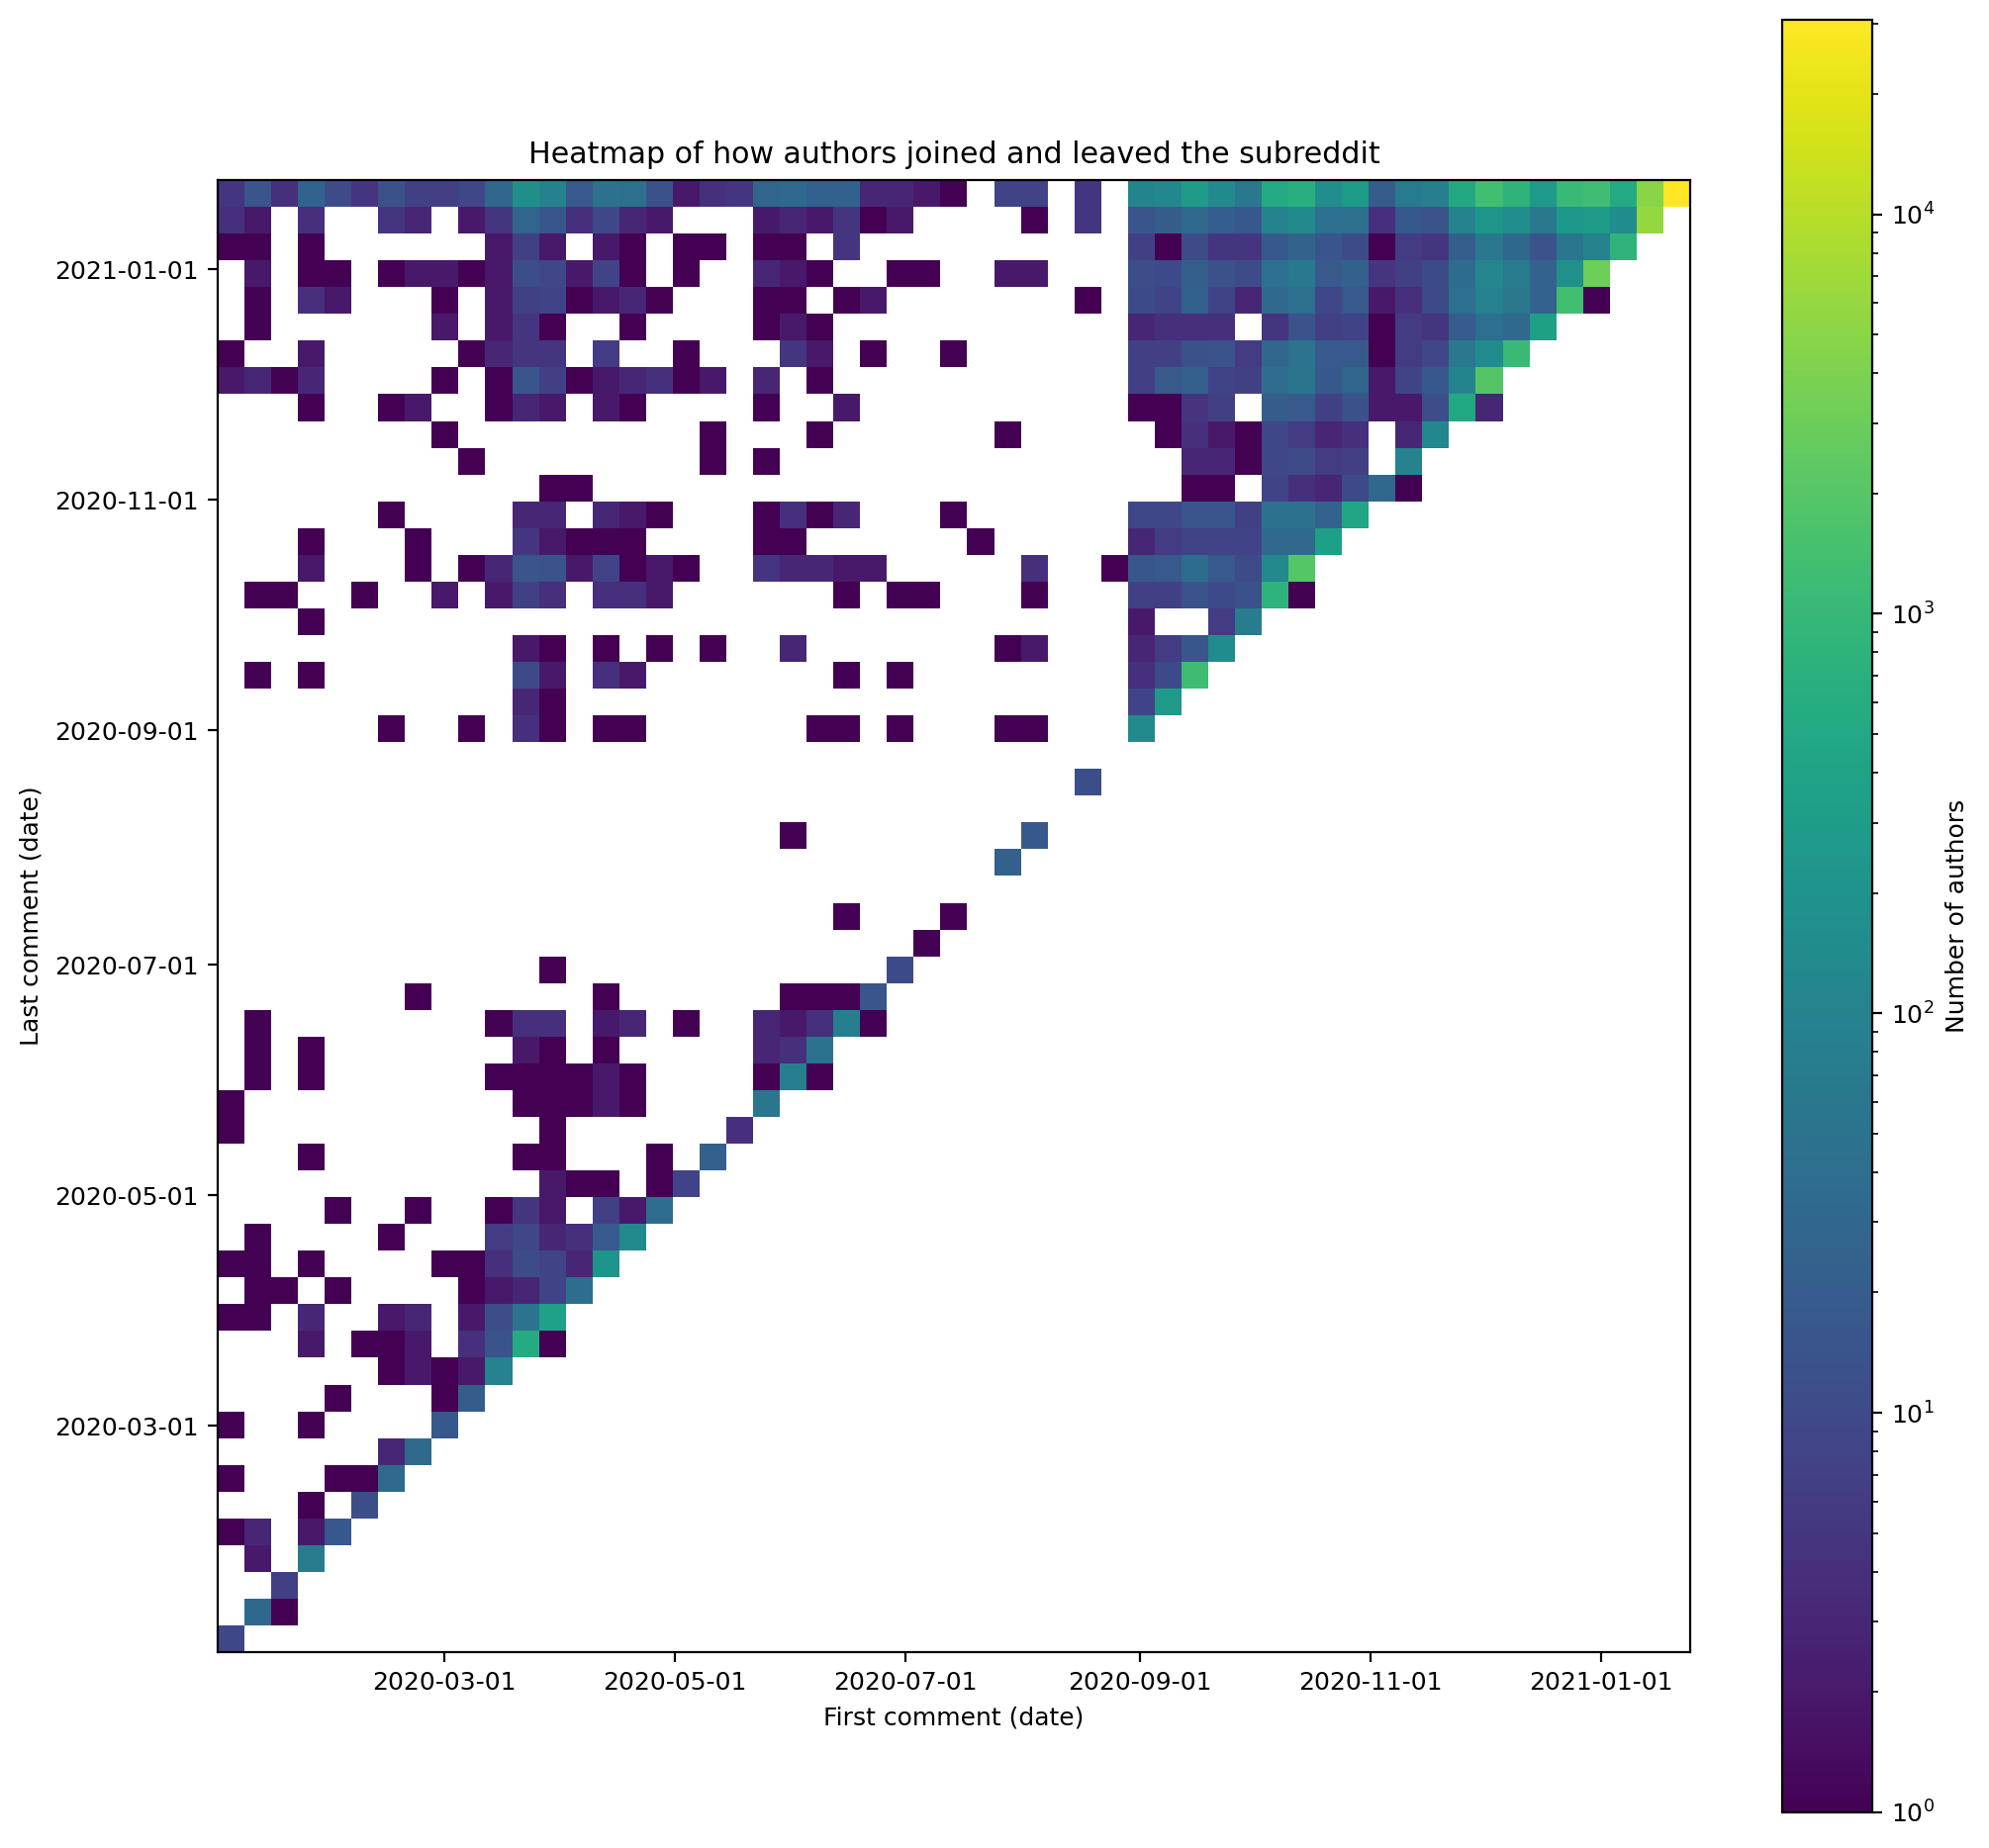

In [54]:
# Specifying the bin length to be 1 week
m = min(lifespan)
M = max(lifespan)
n_bins = int((M-m)/(86400*7))

edges = [min(min_time)-10, max(min_time)+10, min(max_time)-10, max(max_time)+10]

# numpy 2d histogram
heatmap, xedges, yedges = np.histogram2d(min_time, max_time, bins = (n_bins, n_bins))

# Showing dates instead of unix timestamps
x_lims = list(map(datetime.datetime.fromtimestamp, [xedges[0], xedges[-1]]))
x_lims = mdates.date2num(x_lims)
y_lims = list(map(datetime.datetime.fromtimestamp, [yedges[0], yedges[-1]]))
y_lims = mdates.date2num(y_lims)

extent = [x_lims[0], x_lims[1], y_lims[0], y_lims[1]]

# Visualising the histogram
fig, ax = plt.subplots(figsize = (12,12))
f = plt.imshow(heatmap.T, extent=extent, norm = mpl.colors.LogNorm(), origin = 'lower')

# Creating appropriate labels and adding colourbar 
ax.xaxis_date()
ax.yaxis_date()
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
ax.yaxis.set_major_formatter(date_format)
fig.colorbar(f, label="Number of authors")

ax.set_xlabel("First comment (date)")
ax.set_ylabel("Last comment (date)")
ax.set_title("Heatmap of how authors joined and leaved the subreddit")

plt.show()

### (6) Observations from the 2d histogram

1. In the diagonal, the colourbar shows a general trend that many authors on the subreddit post their first and last comment on the same day. Additionally, most in this trend commented mostly at the end of the time period the data is taken from. 
2. In the upper-right corner one can see that most authors joined in the subreddit at the end, when the subreddit blew up online. 
3. At the upper-left corner one can see the authors which joined the subreddit early and stayed the entire duration. 


# Part 3: Exercises using the NetworkX library

### Solution to the 'Königsberg Problem'


Euler proved that for a graph to have the properties described in "Königsberg Problem" it must have a maximum of two nodes with an uneven number of vertices.

Nodes in graph a. and c. all have even degrees.

All four nodes in graph b. have uneven degrees.

Graph d has exactly two nodes with uneven degree.

Thus, graph a., c., and d., satisfies Eulers rule, and can be drawn without lifting the pen or drawing a line more than once, and graph b. cannot.

### Exercise 2.3 ('Graph representation') 


#### Adjacency matrix and link list

In [2]:
import networkx as nx
import numpy as np
#Undirected graph of 6 nodes and 7 links.
G = nx.Graph()
G.add_nodes_from((1,2,3,4,5,6))
G.add_edges_from([(1,2), (2,3),(2,4), (1,3), (1,6), (1,4), (6,3)])

# Link list matrix: 
adj_list = G.adj
print("Undirected graph adjacency list:\n", G.adj)
print("Undirected graph linked list:\n", G.edges)
print()

# Adj matrix
adj_matrix = nx.linalg.graphmatrix.adjacency_matrix(G).todense()
print("Undirected graph adjencency matrix:\n", nx.adjacency_matrix(G).todense())


Undirected graph adjacency list:
 {1: {2: {}, 3: {}, 6: {}, 4: {}}, 2: {1: {}, 3: {}, 4: {}}, 3: {2: {}, 1: {}, 6: {}}, 4: {2: {}, 1: {}}, 5: {}, 6: {1: {}, 3: {}}}
Undirected graph linked list:
 [(1, 2), (1, 3), (1, 6), (1, 4), (2, 3), (2, 4), (3, 6)]

Undirected graph adjencency matrix:
 [[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


In [3]:
#Directed graph of 6 nodes and 8 directed links.
DG = nx.DiGraph()
DG.add_nodes_from((1,2,3,4,5,6))
DG.add_edges_from([(6,1), (1,2),(2,3), (3,2), (3,1),(4,1), (6,3), (2,4)])

# Link list matrix:
adj_list = DG.adj
print("Directed graph adjencency list:\n",adj_list)
print("Directed graph linked list:\n",DG.edges)
print()

# Adj matrix
adj_matrix = nx.linalg.graphmatrix.adjacency_matrix(DG).todense()
print("Directed graph adjencency matrix:\n", nx.adjacency_matrix(DG).todense())

Directed graph adjencency list:
 {1: {2: {}}, 2: {3: {}, 4: {}}, 3: {2: {}, 1: {}}, 4: {1: {}}, 5: {}, 6: {1: {}, 3: {}}}
Directed graph linked list:
 [(1, 2), (2, 3), (2, 4), (3, 2), (3, 1), (4, 1), (6, 1), (6, 3)]

Directed graph adjencency matrix:
 [[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


#### Switching node 5 and 6 in graph

Switching node 5 and 6, will switch these two columns and rows.

In the link list 5 will take 6's spot, and 6 will be removed.


#### Average clustering coefficient
The average clustering coefficient of the network can be calculated by:

In [4]:
C = nx.algorithms.cluster.average_clustering(G)
DC = nx.algorithms.cluster.average_clustering(DG)

print("Average clustering coefficient for undirected graph:", np.round(C,3))
print("Average clustering coefficient for Directed graph:", np.round(DC,3))

Average clustering coefficient for undirected graph: 0.639
Average clustering coefficient for Directed graph: 0.322


#### What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?

Linked list do not contain information about nodes that are not connected to other nodes.

#### Possible paths of length 3, with possible repition, from node 1 to 3

Undirected graph:

(1 -> 2 -> 1 -> 3), (1 -> 4 -> 1 -> 3), (1 -> 4 -> 2 -> 3), (1 -> 6 ->  1 -> 3).

If goal can also be revisited one more path is possible:
(1 -> 3 -> 1 ->3)

Directed graph:

No possible paths.

### Bipartite Networks

#### Adjacency matrix

In [5]:
B = nx.Graph()

B.add_nodes_from((1,2,3,4,5,6), bipartite=0)
B.add_nodes_from((7,8,9,10,11), bipartite=1)
B.add_edges_from([(1,7), (2,9), (3,7), (3,8), (3,9), (4,9),(4,10),(5,9),(5,11),(6,11)])

In [6]:
# Link list matrix:
adj_list = B.adj
print("Directed graph adjencency list:\n",adj_list)
print("Directed graph linked list:\n",B.edges)
print()

# Adj matrix
adj_matrix = nx.linalg.graphmatrix.adjacency_matrix(B).todense()
print("Directed graph adjencency matrix:\n", nx.adjacency_matrix(B).todense())



Directed graph adjencency list:
 {1: {7: {}}, 2: {9: {}}, 3: {7: {}, 8: {}, 9: {}}, 4: {9: {}, 10: {}}, 5: {9: {}, 11: {}}, 6: {11: {}}, 7: {1: {}, 3: {}}, 8: {3: {}}, 9: {2: {}, 3: {}, 4: {}, 5: {}}, 10: {4: {}}, 11: {5: {}, 6: {}}}
Directed graph linked list:
 [(1, 7), (2, 9), (3, 7), (3, 8), (3, 9), (4, 9), (4, 10), (5, 9), (5, 11), (6, 11)]

Directed graph adjencency matrix:
 [[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


#### Why is it a block-diagonal matrix?

In a bipartite graph, each part/side has no direct link to any node in the same part. This results in a block-diagonal matrix, with no connections between nodes 1 to 6 and 7 to 11.

### Projections

In [7]:
P1 = nx.Graph()
P1.add_nodes_from((1,2,3,4,5,6))
P1.add_edges_from([(1,3),(3,2),(3,4),(3,5),(2,4),(2,5),(4,5),(5,6)])

P2 = nx.Graph()
P2.add_nodes_from((7,8,9,10,11))
P2.add_edges_from([(7,8),(7,9),(8,9),(9,10),(9,11)])

adj_P1 = nx.linalg.graphmatrix.adjacency_matrix(P1).todense()
adj_P2 = nx.linalg.graphmatrix.adjacency_matrix(P2).todense()

print("Adjacency matrix for purple projection:", adj_P1)
print()
print("Adjacency matrix for green projection:", adj_P2)

Adjacency matrix for purple projection: [[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]

Adjacency matrix for green projection: [[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


### Average degrees

In [9]:
sum_purple = 0
sum_green = 0
for i in range(1,12):
    if i < 7:
        sum_purple += B.degree(i)
    else:
        sum_green += B.degree(i)
        
print("Average degree purple:", np.round(sum_purple/6,3))
print("Average degree green:", np.round(sum_green/5,3))
print()
sum_p1 = 0
sum_p2 = 0
for i in range(1,7):
    sum_p1 += P1.degree(i)
for i in range(7,12):
    sum_p2 += P2.degree(i)

print("Average degree purple projection:", np.round(sum_p1/6,3))
print("Average degree green projection:",np.round(sum_p2/5,3))



Average degree purple: 1.667
Average degree green: 2.0

Average degree purple projection: 2.667
Average degree green projection: 2.0


###  Is it surprising that the values are different from those obtained earlier

No, if a node is connected to only one node in the bipartite graph, the degree would be 1, but the same node could be connected to multiple nodes in the projection, which would increase the degree, and therefore the average degree. If for example a bipartite graph consisted of 5 nodes, each only connected to a 6'th node, each of the 5 nodes would have degree 1 in the bipartite graph, but degree 5 in the projection. The degree of the 6'th node would be 5 in the original graph, but 0 in the projection.

# Part 4: Preliminary analysis of the GME redditors network
> Consider the directed network of redditors posting about GME on r/wallstreetbets in the period included between Jan 1st and Dec 31st, 2020 (the one you built in Week 3, Part 3).
> * Why do you think I want you guys to use a _directed_ graph? Could have we used an undirected graph instead?
> * What is the total number of nodes in the network? What is the total number of links? What is the density of the network (the total number of links over the maximum number of links)?
> * What are the average, median, mode, minimum and maximum value of the in-degree (number of incoming edges per redditor)? And of the out-degree (number of outgoing edges per redditor)? How do you intepret the results?
> * List the top 5 Redditors by in-degree and out-degree. What is their average score over time? At which point in time did they join the discussion on GME? When did they leave it?
> * Plot the distribution of in-degrees and out-degrees, using a logarithmic binning. 
> * Plot a scatter plot of the the in- versus out- degree for all redditors. Comment on the relation between the two.
> * Plot a scatter plot of the the in- degree versus average score for all redditors. Comment on the relation between the two.

In this part the comments and submission data in the period from 2020-01-01 to 2020-12-31 (including) will be investigated. After removing all comments where the author and/or parent author is deleted the data set comprises 115140 comments. 

To investigate how the authors are linked by comments one need to consider the author of a comment as well as what the author of the comment/submission the comments-author has commented on. Thus the information of interest from the two data sets "submission" and "comments" are extracted and merged into a new data set. Moreover, a variable comprising only ones is added to the new dataset. The later variable will help finding the weight of each link i.e. the quantity of comments from one author to another. One can examine the new merged dataset in the following: 

In [40]:
Data = pd.read_csv('merged.csv')
Data = Data.drop(['Unnamed: 0'], axis=1)

To gain knowledge of which nodes are linked as well as the weigh of each link, edge_list, the data set ought to be grouped as follows: 

In [41]:
Data_grouped = Data.groupby(["author", "parent_author"]).sum()
edge_list = Data_grouped.count
Data_grouped

count
author             parent_author          
----The_Truth----- BorpleFlorpleWho    1.0
                   CD2471              1.0
                   DeepFuckingValue    1.0
---MrP---          Nasty_Nate2324      1.0
                   Uberkikz11          2.0
...                                    ...
zyroyoyz           Stonksflyingup      1.0
zyx1989            Youkiame            1.0
zyx2239            dcluttrell          1.0
zzman14            hrifandi            1.0
zzzaacchh          AceOrigins          1.0

[97412 rows x 1 columns]

<strong>Directed graph:</strong> To model the network one shall use a directed graph. The reason one shall use a directed graph opposed to an undirected graph is that a directed graph contains information of which author responded to a comments/submission and which author wrote the comment/submission responded to. 

Following code creates the directed graph, G. 

In [42]:
#Create weighted directed graph 

G = nx.DiGraph()

#Add nodes and weighted edges
def add_weighted_edges(df,idx):
    A = df.index[idx][0]
    B = df.index[idx][1] 
    weight = df.values[idx]
    G.add_weighted_edges_from([(A,B,weight)])
    
    return None

num_edges = len(Data_grouped)
for idx in range(num_edges): 
    add_weighted_edges(Data_grouped,idx)

<strong>Following code computes the total number of nodes, N , total number of links, L, and the density of the network</strong>. 

The density of a network is defined as $\frac{L}{L_{max}}$. $L_{max}$ is computed according to eq. 2.12 from the Network Science book. 

In [43]:
#Total number of nodes
N = G.number_of_nodes()

#Total number of links
L = G.number_of_edges()

#Density of the network (eq. 2.12 i læsemateriale)
L_max = N*(N-1)/2
Density = L/L_max

From the above code, following values are computed: 

|Graph information||
|---|---|
|N| 30119|
|L|97412|
|Density |2.1477e-4|



<strong> Following code computes a number of statistics of the in-degree and out-degree of each node</strong>

In [44]:
#Get degrees
in_ = G.in_degree(G.nodes, weight='weight')
out_ = G.out_degree(G.nodes, weight='weight')

#Store in list
in_L = [int(val) for (node, val) in in_]
out_L = [int(val) for (node, val) in out_]

#Average score for future use
authors = [n for n in G.nodes]

Score = []
for idx, author in enumerate(authors): 
    score = CommentsD.score[CommentsD.author == author].tolist() + CommentsD.score[CommentsD.parent_author == author].tolist()
    Score.append(np.mean(score))

#store in dataframe
Degree = pd.DataFrame.from_dict({'in_degree': in_L, 
                       'out_degree': out_L, 
                               'ave_score': Score} )

Degree.index = [node for (node, val) in in_]


In [45]:
#Compute statistics

#average
mean = Degree.mean()

#median
median = Degree.median()

#mode
mode = Degree.mode()

#minimum
Max = Degree.max()

#maximum
Min = Degree.min()


<strong>From the above code, following values are computed: </strong>

|Statistics |in degree| outdegree |
| --- | ----------- | ----------- |
| Mean  | 3.82 | 3.82|
| Median  | 0 | 1 |
| Mode | 0 | 1 |
|Min |0|0|
|Max|3294| 1068|


From the statistics, one can deduct that there is a large foundation of authors who receive only few comments and likewise they onle a few times respond to comments or submissions. Furthermore, based on the median, it can be seen that there is a larger number of authors who does not receive a comment at all, than the number of authors who writes zero comments. 
Compared to the other statistics,  the maximum in- and out- degree are a lot larger. Thus implies that a smaller number of authors receive a lot of comments and/or responds to a lot of comments or submissions. Though the author who receives the most comments, received a lot more comments than the author who responds to the most comments/submissions, write comments. 

<strong> Following code finds the top 5 redditors, their average score over time and the period of time they were part of the discussion </strong>

In [46]:
#List the top 5 Redditors by in-degree and out-degree. What is their average score over time? At which point in time did they join the discussion on GME? When did they leave it?
n = 5
top5in = Degree.nlargest(n, 'in_degree', keep='first')
top5out = Degree.nlargest(n, 'out_degree', keep='first')

#Average score over time
authors = top5in.index.tolist() + top5out.index.tolist()

Score = []
MinDate = []
MaxDate = []
for idx, author in enumerate(authors): 
    score = CommentsD.score[CommentsD.author == author].tolist() + CommentsD.score[CommentsD.parent_author == author].tolist()
    date = CommentsD.creation_date[CommentsD.author == author].tolist() + CommentsD.creation_date[CommentsD.parent_author == author].tolist()
    Score.append(np.mean(score))
    MinDate.append(min(date))
    MaxDate.append(max(date))

DfTop5 = pd.DataFrame()
DfTop5['Joined_Discussion'] = MinDate
DfTop5['Left_Discussion'] = MaxDate
DfTop5['Average_Score'] = Score
DfTop5.index = authors




<strong>In the tables below are listed the average score of the authors as well as the dates of which the authors joined and left the discussion. </strong>

|5 authors who received the most comments||||
| -------------| -------------  | ------------- | ------------- |
|<strong>Author</strong>|<strong>Joined Discussion</strong>| <strong>Left Discussion</strong> | <strong>Average Score</strong>|
|DeepFuckingValue      |      2020-01-01  |    2020-12-31   |    2.748398|
|Youkiame            |        2020-10-09   |   2020-12-31    |   1.414190|
|OPINION_IS_UNPOPULAR    |    2020-06-05   |   2020-12-24  |     9.617048|
|rapsfan1515     |            2020-10-10   |   2020-12-24   |    1.079767|
|None             |           2020-08-31   | 2020-12-31    |   2.996534|


|5 authors who responded to most comments or submissions||||
| -------------| -------------  | ------------- | ------------- |
|<strong>Author</strong>|<strong>Joined Discussion</strong>| <strong>Left Discussion</strong> | <strong>Average Score</strong>|
|WSBVoteBot        |          2020-04-29    |  2020-12-31    |   1.010989|
|Ackilles           |         2020-09-06    |  2020-12-31   |    3.516508|
|Stonksflyingup      |        2020-09-09   |   2020-12-31    |   2.657913|
|AutoModerator        |       2020-01-02   |   2020-12-31    |   1.417504|
|sneakersourcerer      |      2020-09-20   |   2020-12-31    |   1.303544|




From the tables, one can tell that the authors did not join the discussion in the same month but they all left in late december 2020.

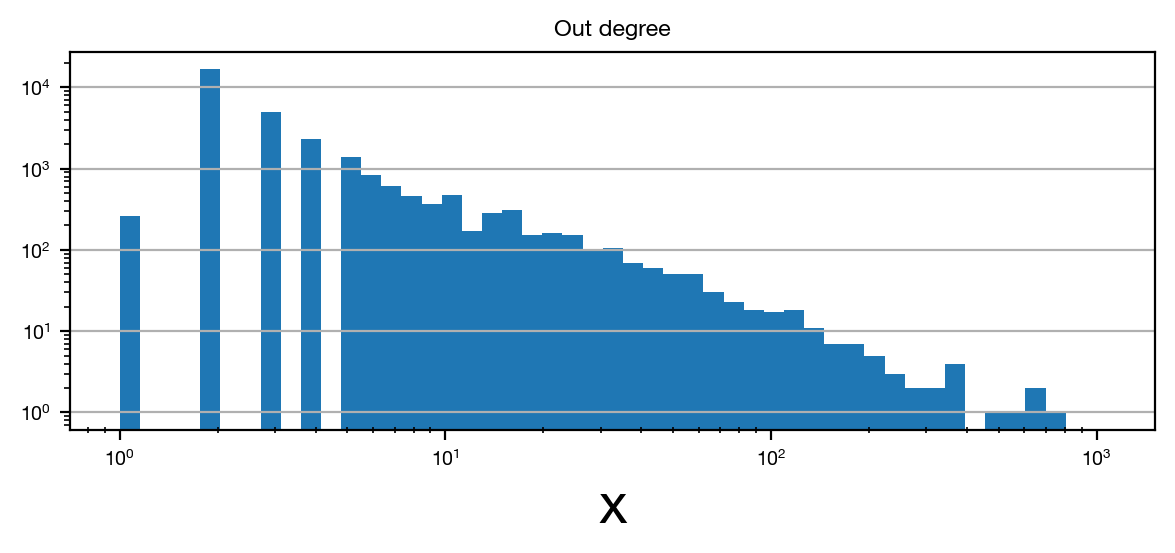

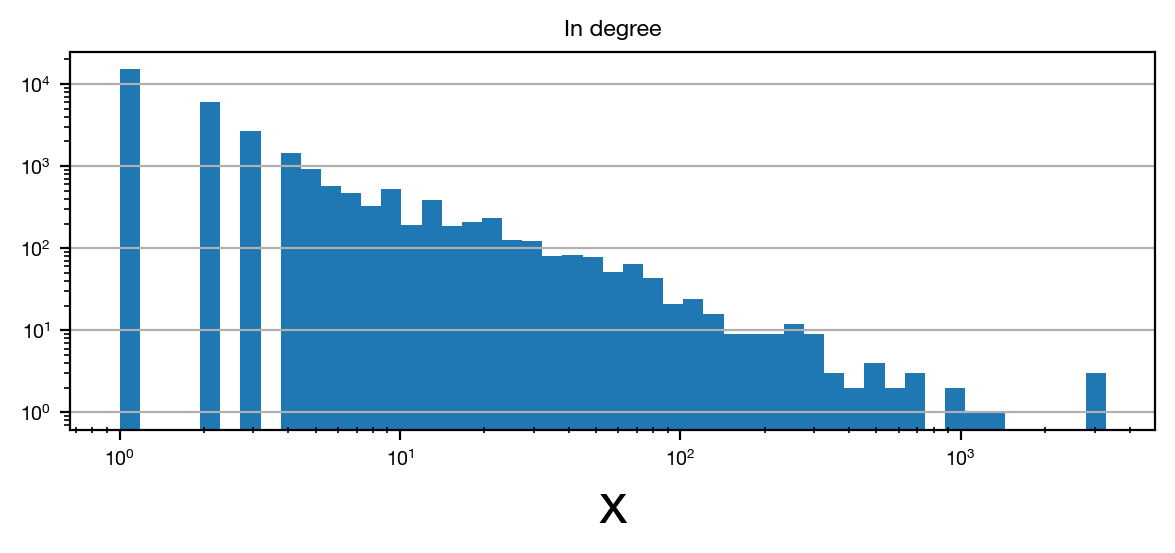

In [52]:
def histogram(data, header): 
    MIN = min(data)
    MAX = max(data)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    bins = np.logspace(0,np.log10(MAX), 50)
    ax.hist(data, bins = bins)
    ax.set_yscale("log")
    fig.gca().set_xscale("log")
    plt.tick_params(axis='x', which='minor', direction = 'inout', pad = 3.0)
    ax.grid(axis='y')
    plt.xlabel('x', size = 20)
    plt.title(header)
    plt.show()


    return bins

binsout = histogram(Degree.out_degree.values + 1**(-20), 'Out degree')
binsin = histogram(Degree.in_degree.values + 1**(-20), 'In degree')

Both of the above histograms show that most authors posts/receives few comments/submissions.  

In [48]:
import matplotlib
def scatter(x,y, xlabel, ylabel,title, log = True): 
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    
    ax.plot(x,y, '.')
    if log: 
        #x = x + 10**(-3)
        #y = y + 10**(-3)
        fig.gca().set_xscale("symlog")
        fig.gca().set_yscale("symlog")
        

    plt.tick_params(axis='x', which='minor', direction = 'inout', pad = 5.0)
    ax.grid()
    plt.xlabel(xlabel, size = 15)
    plt.ylabel(ylabel, size = 15)
    plt.title(title)
   
    plt.show()

    
    return None




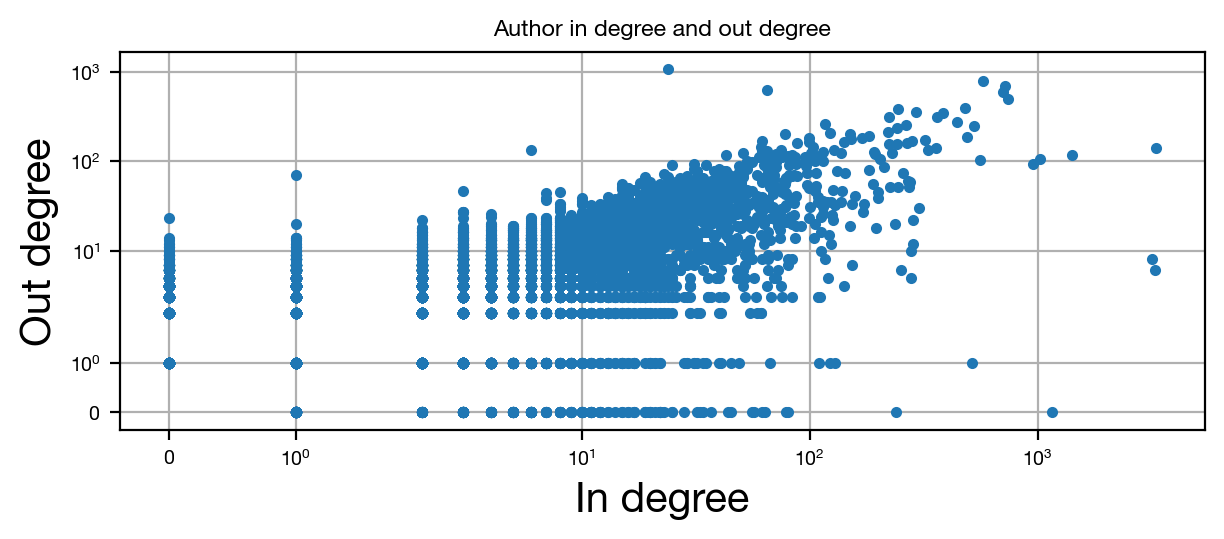

In [49]:

scatter(Degree.in_degree, Degree.out_degree, 'In degree', 'Out degree',  'Author in degree and out degree', log = True)
        

The above scatter plot show that authors who post a lot receives a lot of comments. Likewise, those who do not post a lot do not receive a lot of comments. 

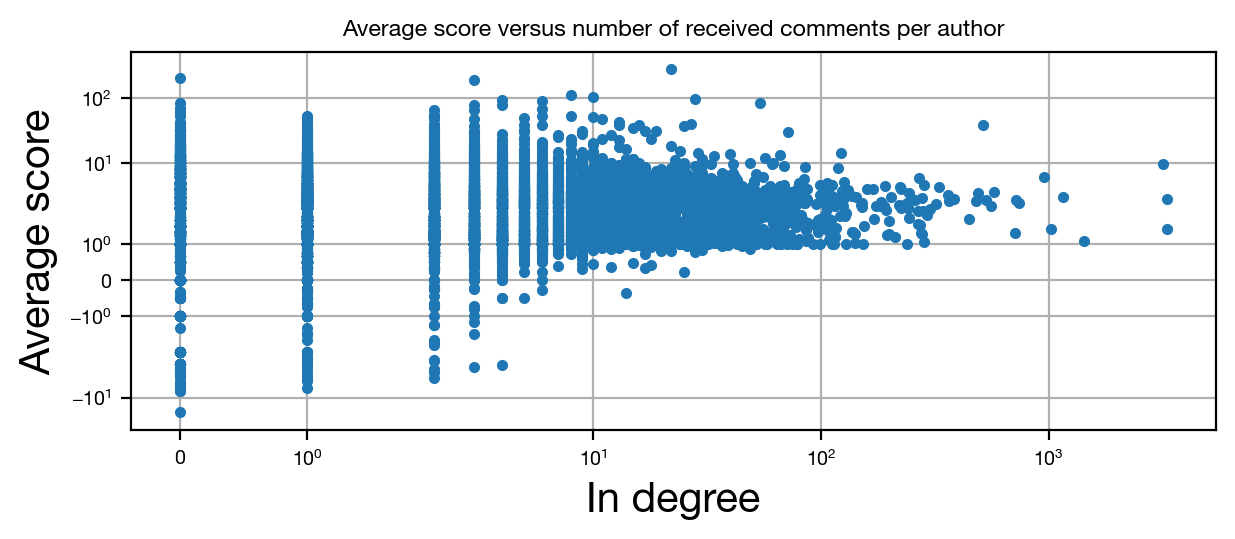

In [50]:
scatter(Degree.in_degree, Degree.ave_score, 'In degree', 'Average score', 'Average score versus number of received comments per author', log = True)

From the above plot one can see that only those who receive few comments get a negative average score.